In [44]:
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import random
from sklearn.discriminant_analysis import StandardScaler
import os
from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [6]:
working_data = pd.read_csv('clusters/cluster_2.csv')
working_data_base = working_data.to_numpy()
working_data_base = working_data_base.astype(float)
working_data_base = np.nan_to_num(working_data_base, nan=0.0)

In [7]:
reducer = umap.UMAP()
umap_data = working_data_base
scaler = StandardScaler()
scaled_umap_data = scaler.fit_transform(umap_data)
embedded_data = reducer.fit_transform(scaled_umap_data)

In [8]:
DBSCAN_data = DBSCAN(eps=0.33,min_samples = 20)
DBSCAN_data.fit(embedded_data)
predictions_DBSCAN = DBSCAN_data.labels_

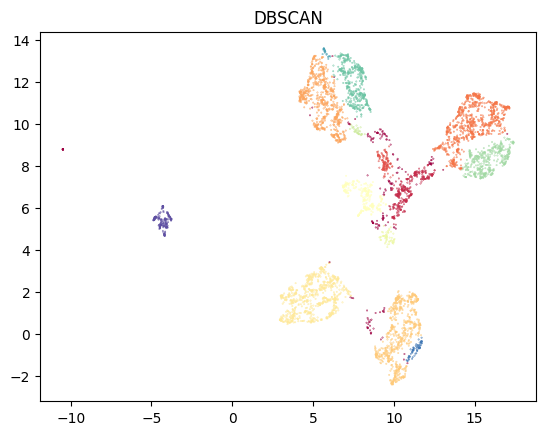

In [9]:
plt.Figure(figsize=(100,100))
plt.scatter(embedded_data[:,0], embedded_data[:,1], c=predictions_DBSCAN, cmap="Spectral", s=0.1)
plt.title("DBSCAN")
plt.show()

In [10]:
working_data['cluster'] = predictions_DBSCAN

In [11]:
working_data['cluster'].max()

13

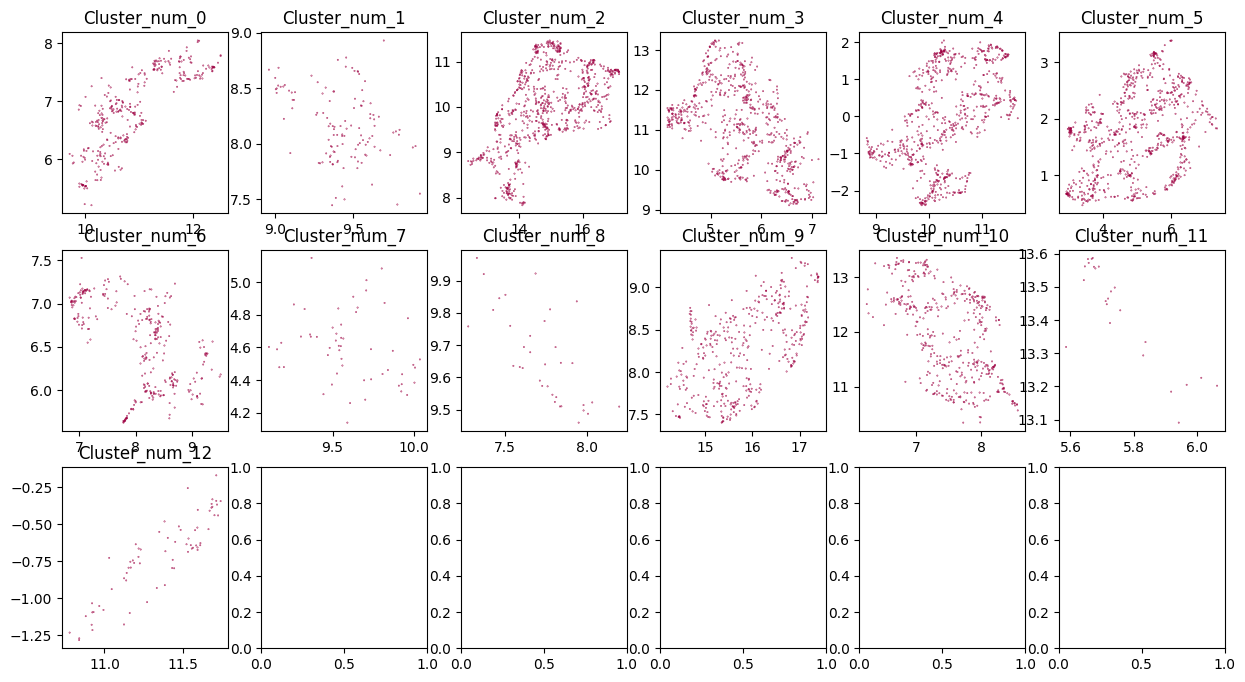

In [12]:
fig, ax = plt.subplots(3,6, figsize=(15,8))
row = col = 0
for x in range(working_data['cluster'].max()):
    moment_data = embedded_data[working_data['cluster'] == x]
    moment_predictions = predictions_DBSCAN[working_data['cluster'] == x]
    ax[row,col].scatter(moment_data[:,0], moment_data[:,1],c=moment_predictions, cmap="Spectral", s=0.1)
    ax[row,col].set_title(f'Cluster_num_{x}')
    col += 1
    if(col >= 6):
        row += 1
        col = 0

In [13]:
# DBSCAN_data = DBSCAN(eps=0.33,min_samples = 20)
# DBSCAN_data.fit(embedded_data)
# predictions_DBSCAN = DBSCAN_data.labels_

AC_data = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
AC_data.fit(embedded_data)
predictions_AC = AC_data.labels_

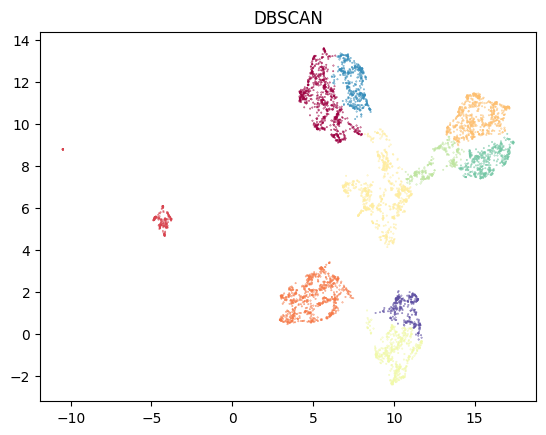

In [14]:
plt.Figure(figsize=(100,100))
plt.scatter(embedded_data[:,0], embedded_data[:,1], c=predictions_AC, cmap="Spectral", s=0.1)
plt.title("DBSCAN")
plt.show()

In [15]:
working_data['cluster'] = predictions_AC
working_data['cluster'].max()

9

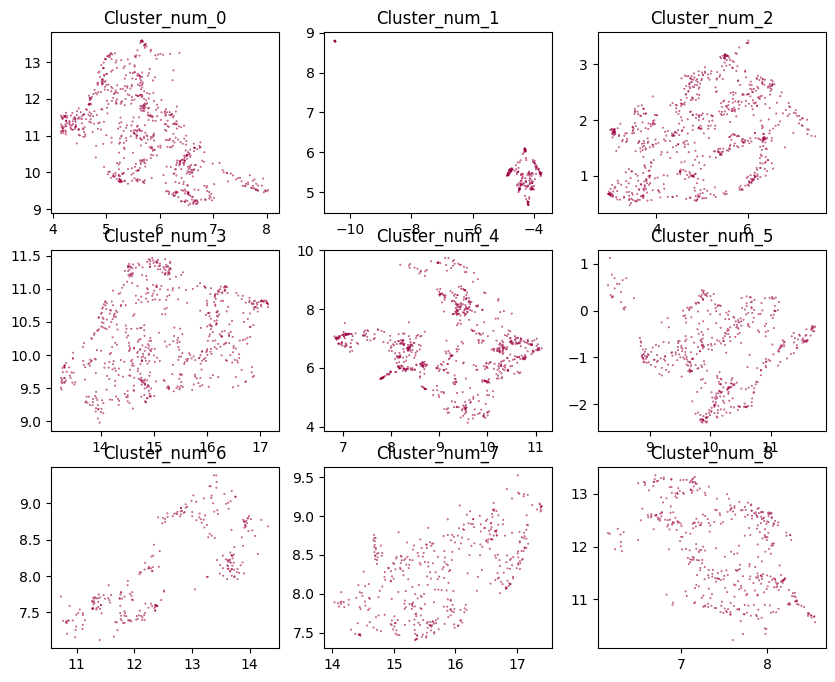

In [16]:
fig, ax = plt.subplots(3,3, figsize=(10,8))
row = col = 0
for x in range(working_data['cluster'].max()):
    moment_data = embedded_data[working_data['cluster'] == x]
    moment_predictions = predictions_AC[working_data['cluster'] == x]
    ax[row,col].scatter(moment_data[:,0], moment_data[:,1],c=moment_predictions, cmap="Spectral", s=0.1)
    ax[row,col].set_title(f'Cluster_num_{x}')
    col += 1
    if(col >= 3):
        row += 1
        col = 0

# TRYING CLUSTER 2 + 3 + 6

In [17]:
crash_clusters = pd.DataFrame()
v = {2,3,6}
for x in v:
    cluster = pd.read_csv(f'clusters/cluster_{x}.csv')
    crash_clusters = pd.concat([crash_clusters, cluster])

In [18]:
crash_clusters_base = crash_clusters.to_numpy()
crash_clusters_base = crash_clusters_base.astype(float)
crash_clusters_base = np.nan_to_num(crash_clusters_base, nan=0.0)

In [19]:
reducer = umap.UMAP()
umap_data_crash = crash_clusters_base
scaler = StandardScaler()
scaled_umap_data_crash = scaler.fit_transform(umap_data_crash)
embedded_data_crash = reducer.fit_transform(scaled_umap_data_crash)

In [20]:
DBSCAN_data = DBSCAN(eps=0.24,min_samples = 20)
DBSCAN_data.fit(embedded_data_crash)
predictions_DBSCAN_crash = DBSCAN_data.labels_

AC_data = AgglomerativeClustering(n_clusters=19, metric='euclidean', linkage='ward')
AC_data.fit(embedded_data_crash)
predictions_AC_crash = AC_data.labels_

Text(0.5, 1.0, 'Agg cluster')

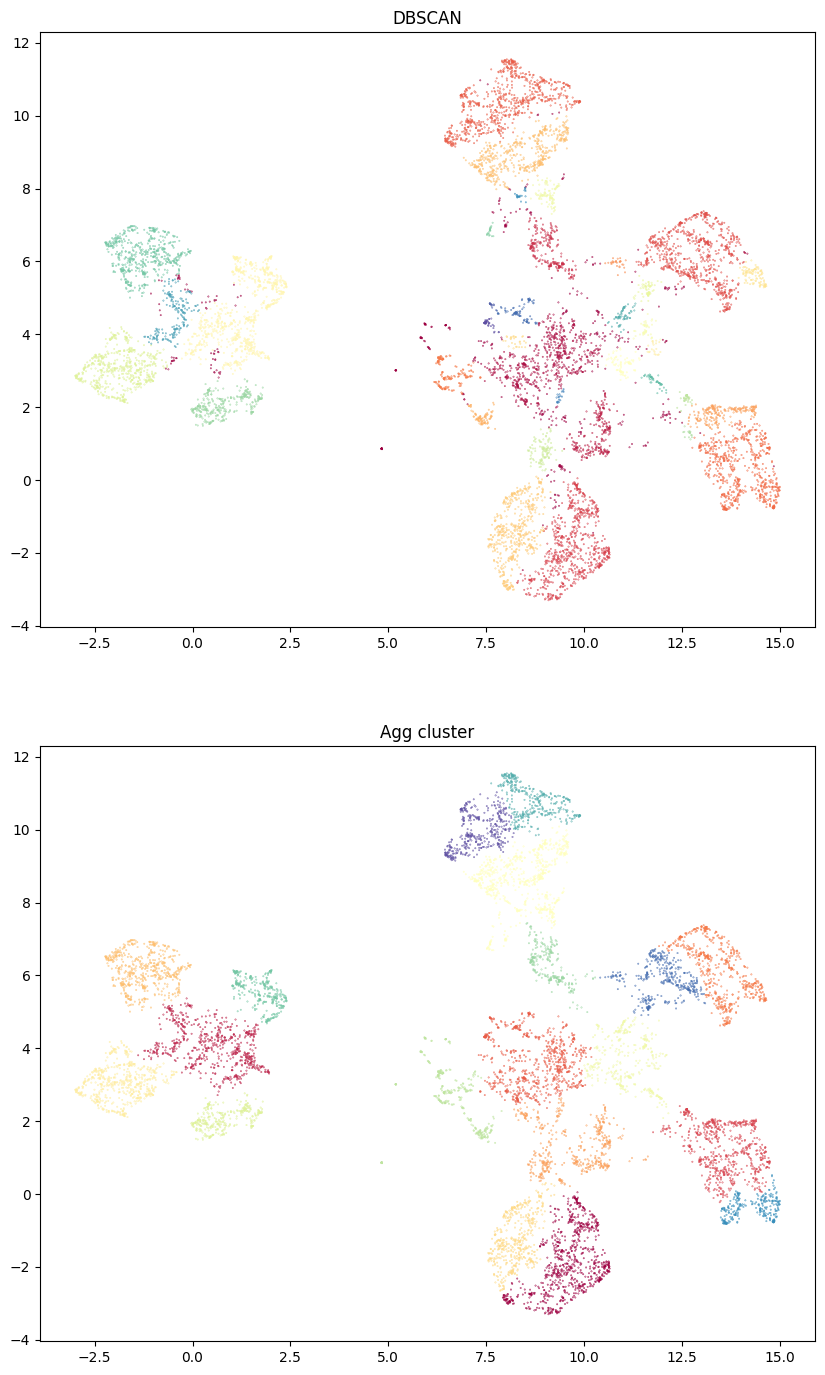

In [21]:
fig, ax = plt.subplots(2,1, figsize=(10,17))

ax[0].scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=predictions_DBSCAN_crash, cmap="Spectral", s=0.1)
ax[0].set_title("DBSCAN")

ax[1].scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=predictions_AC_crash, cmap="Spectral", s=0.1)
ax[1].set_title("Agg cluster")

In [22]:
crash_clusters['cluster'] = predictions_AC_crash
crash_clusters['cluster'].max()

18

In [23]:
moment_describe = crash_clusters
moment_describe = moment_describe.drop(columns={'cluster', 'Date'})
described_data = moment_describe.describe()
described_data = described_data.T
described_data = described_data.drop(columns={'min', 'max'})
described_data = described_data.T
# described_data = described_data.drop(index={5,6,7,8,9})
described_data.to_csv(f'crash_data_stats/main_cluster')
main_traffic = described_data

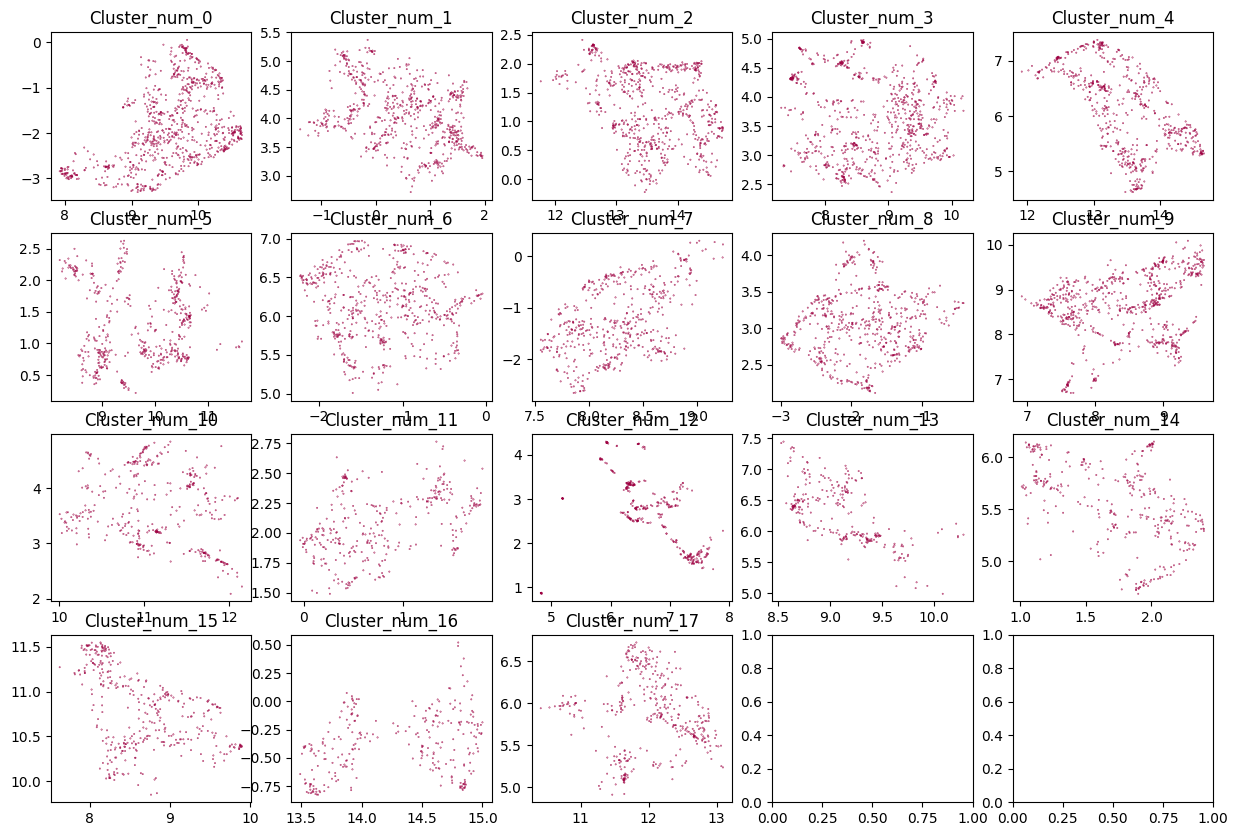

In [24]:
fig, ax = plt.subplots(4,5, figsize=(15,10))
row = col = 0

for x in range(crash_clusters['cluster'].max()):
    moment_data = embedded_data_crash[crash_clusters['cluster'] == x]
    moment_predictions = predictions_AC_crash[crash_clusters['cluster'] == x]
    ax[row,col].scatter(moment_data[:,0], moment_data[:,1],c=moment_predictions, cmap="Spectral", s=0.1)
    ax[row,col].set_title(f'Cluster_num_{x}')
    
    moment_describe = crash_clusters[crash_clusters['cluster'] == x]
    moment_describe = moment_describe.drop(columns={'cluster', 'Date'})
    described_data = moment_describe.describe()
    described_data = described_data.T
    described_data = described_data.drop(columns={'min', 'max'})
    described_data = described_data.T
    described_data.to_csv(f'crash_data_stats/cluster_{x}')
    
    col += 1
    if(col >= 5):
        row += 1
        col = 0

In [25]:
main_traffic.subtract(described_data)

Direction         Time      TRAFFIC         PRCP         SNOW  \
count  8817.000000  8817.000000  8817.000000  8164.000000  8170.000000   
mean      0.499891    -4.105651   171.460994     0.039404     0.475186   
std       0.500027     1.512208   204.809654     0.079313     1.046546   
25%       0.000000    -6.000000    21.000000     0.000000     0.000000   
50%       0.000000    -4.000000   130.500000     0.000000     0.000000   
75%       1.000000    -3.000000   301.000000     0.050000     0.400000   

              SNWD  SNOW_DAY_SUM     Vehicles   Driver Age  Condition_Code  \
count  2303.000000   8170.000000  8817.000000  8817.000000     8817.000000   
mean      2.897835      0.683030     0.633507    -2.647769        0.404686   
std       3.774814      0.947666     0.584638    -1.186471        0.683377   
25%      -2.125000      0.000000     0.000000    -1.000000        0.000000   
50%       1.750000      0.500000     1.000000    -3.000000        0.000000   
75%       5.500000      1.300000     1.000000    -4.000000        1.000000   

              MorF    DayOfWeek  
count  8817.000000  8817.000000  
mean      0.278974    -0.545432  
std       0.448519    -0.033443  
25%       0.000000    -1.000000  
50%       0.000000    -1.000000  
75%       1.000000     0.000000

In [26]:
data_for_crash = crash_clusters

X = crash_clusters['TRAFFIC'].to_numpy()
y = crash_clusters['SNOW'].to_numpy()
z = crash_clusters['Time'].to_numpy()

X = X.reshape(-1,1)
y_1 = [y,z]

X = np.nan_to_num(X, nan=0.0)
y_1 = np.nan_to_num(y_1, nan=0.0)

In [27]:
y_1

array([[ 1.9,  1.9,  1.9, ...,  0. ,  2.2,  2.2],
       [ 2. ,  2. , 12. , ..., 17. , 15. , 15. ]])

In [28]:
# model = LinearRegression()
# maybe_works = model.fit(X, y_1)

In [29]:
reducer = umap.UMAP()
umap_data_crash_again = embedded_data_crash
scaler = StandardScaler()
scaled_umap_data_crash_again = scaler.fit_transform(umap_data_crash_again)
embedded_data_crash_again = reducer.fit_transform(scaled_umap_data_crash_again)

In [30]:
DBSCAN_data = DBSCAN(eps=0.24,min_samples = 20)
DBSCAN_data.fit(embedded_data_crash_again)
predictions_DBSCAN_crash_again = DBSCAN_data.labels_

AC_data = AgglomerativeClustering(n_clusters=19, metric='euclidean', linkage='ward')
AC_data.fit(embedded_data_crash_again)
predictions_AC_crash_again = AC_data.labels_

Text(0.5, 1.0, 'Agg cluster')

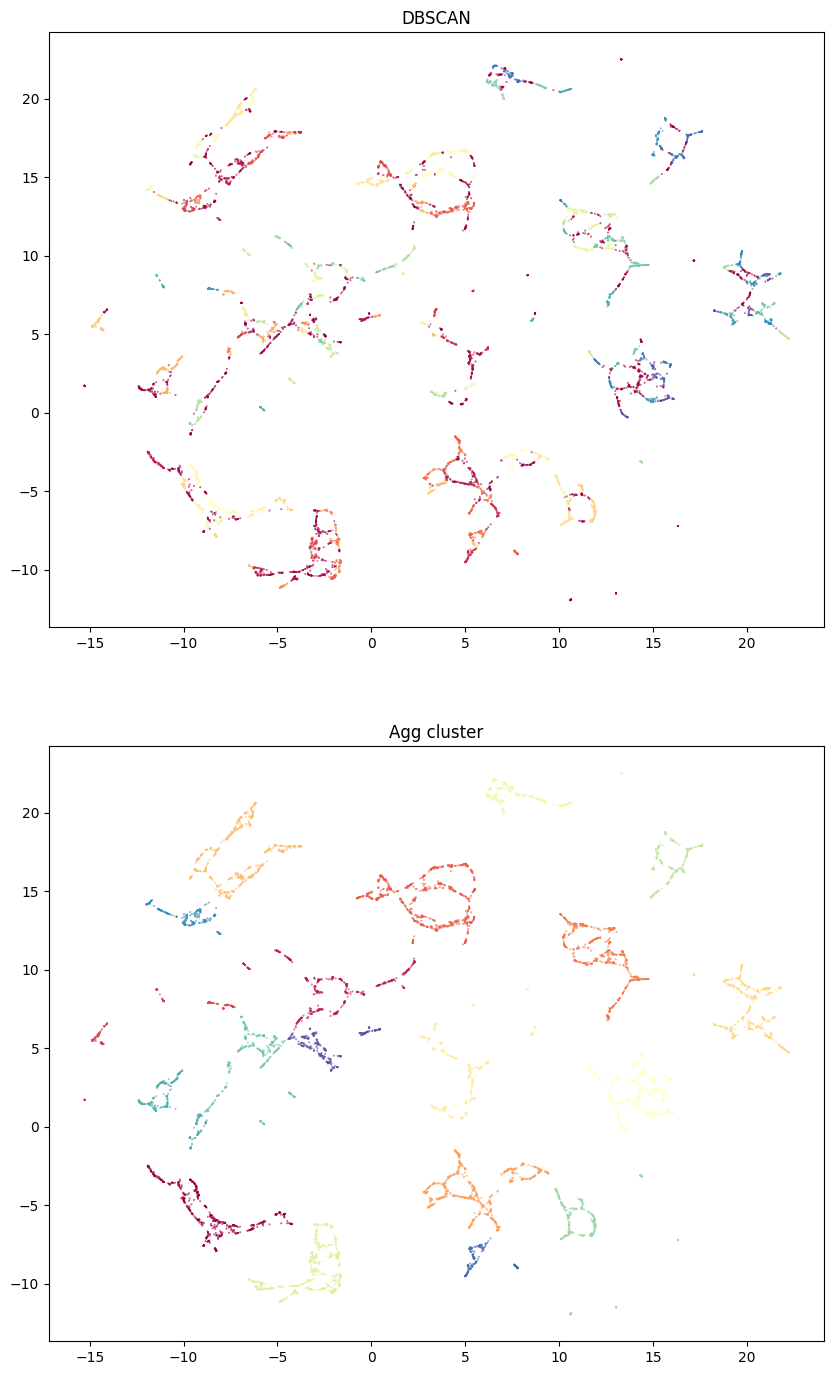

In [31]:
fig, ax = plt.subplots(2,1, figsize=(10,17))

ax[0].scatter(embedded_data_crash_again[:,0], embedded_data_crash_again[:,1], c=predictions_DBSCAN_crash_again, cmap="Spectral", s=0.1)
ax[0].set_title("DBSCAN")

ax[1].scatter(embedded_data_crash_again[:,0], embedded_data_crash_again[:,1], c=predictions_AC_crash_again, cmap="Spectral", s=0.1)
ax[1].set_title("Agg cluster")

Text(0.5, 1.0, 'Agg cluster')

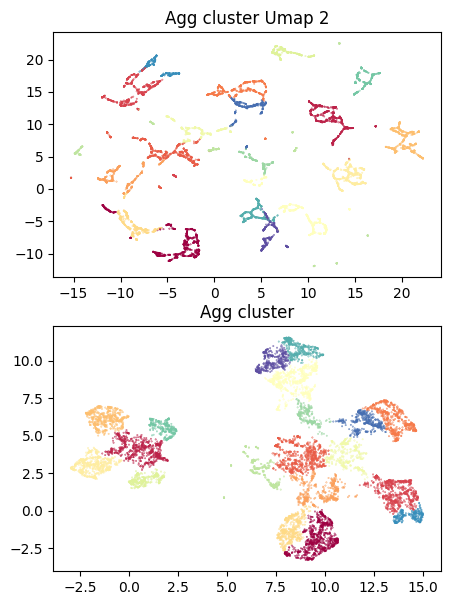

In [32]:
fig, ax = plt.subplots(2,1, figsize=(5,7))

ax[0].scatter(embedded_data_crash_again[:,0], embedded_data_crash_again[:,1], c=predictions_AC_crash, cmap="Spectral", s=0.1)
ax[0].set_title("Agg cluster Umap 2")

ax[1].scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=predictions_AC_crash, cmap="Spectral", s=0.1)
ax[1].set_title("Agg cluster")

Text(0.5, 1.0, 'Testing other cluster')

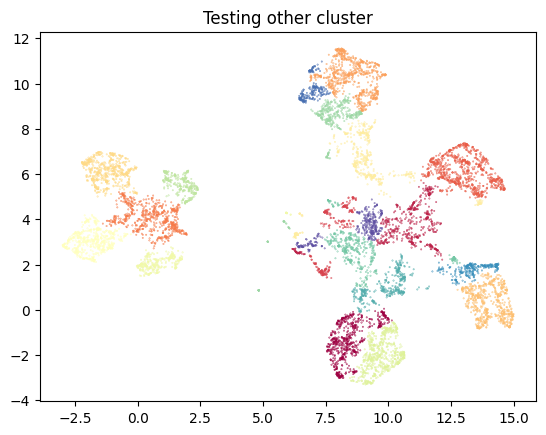

In [33]:
plt.Figure(figsize=(12,12))
plt.scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=predictions_AC_crash_again, cmap="Spectral", s=0.1)
plt.title("Testing other cluster")

In [34]:
to_iso = pd.DataFrame()
v = {2,3,6}
for x in v:
    cluster = pd.read_csv(f'clusters/cluster_{x}.csv')
    to_iso = pd.concat([to_iso, cluster])
to_iso = to_iso.to_numpy()
to_iso = to_iso.astype(float)
to_iso = np.nan_to_num(to_iso, nan=-1.0)
iso = Isomap(n_neighbors = 100, n_components = 2)
traffic_crash_isomap = iso.fit_transform(to_iso)

C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\wsach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  se

In [35]:
AC_data = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
AC_data.fit(traffic_crash_isomap)
AC_traffic_data = AC_data.labels_

Text(0.5, 1.0, 'using the isomap clusters into umap')

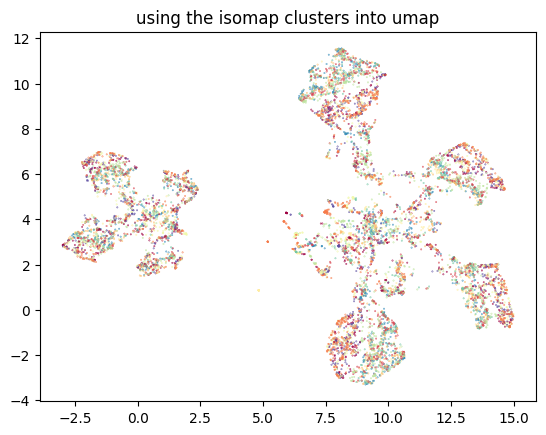

In [36]:
plt.Figure(figsize=(12,12))
plt.scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=AC_traffic_data, cmap="Spectral", s=0.1)
plt.title("using the isomap clusters into umap")

In [40]:
tsne = TSNE(n_components=3, random_state=42)
crash_clusters_base_2d = tsne.fit_transform(crash_clusters_base)

Text(0.5, 1.0, 'using t-sne')

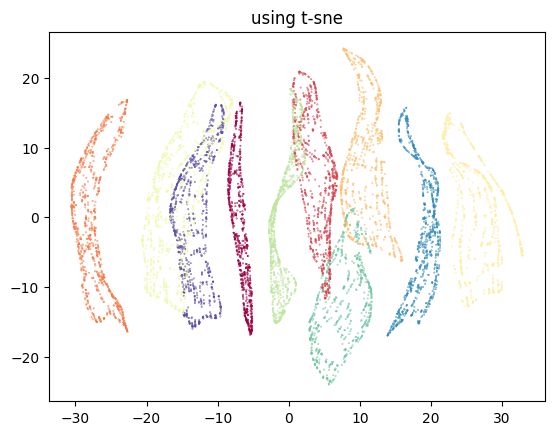

In [41]:
plt.Figure(figsize=(12,12))
plt.scatter(crash_clusters_base_2d[:,0], crash_clusters_base_2d[:,1], c=AC_traffic_data, cmap="Spectral", s=0.1)
plt.title("using t-sne")

Text(0.5, 1.0, 'using t-sne')

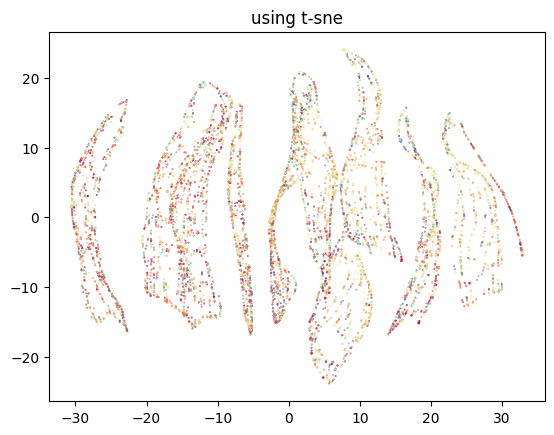

In [77]:
plt.Figure(figsize=(12,12))
plt.scatter(crash_clusters_base_2d[:,0], crash_clusters_base_2d[:,1], c=predictions_AC_crash_again, cmap="Spectral", s=0.1)
plt.title("using t-sne")

In [78]:
clust = pd.DataFrame()
v = {2,3,6}
for x in v:
    cluster = pd.read_csv(f'clusters/cluster_{x}.csv')
    clust = pd.concat([clust, cluster])
clust = clust.fillna(-1)

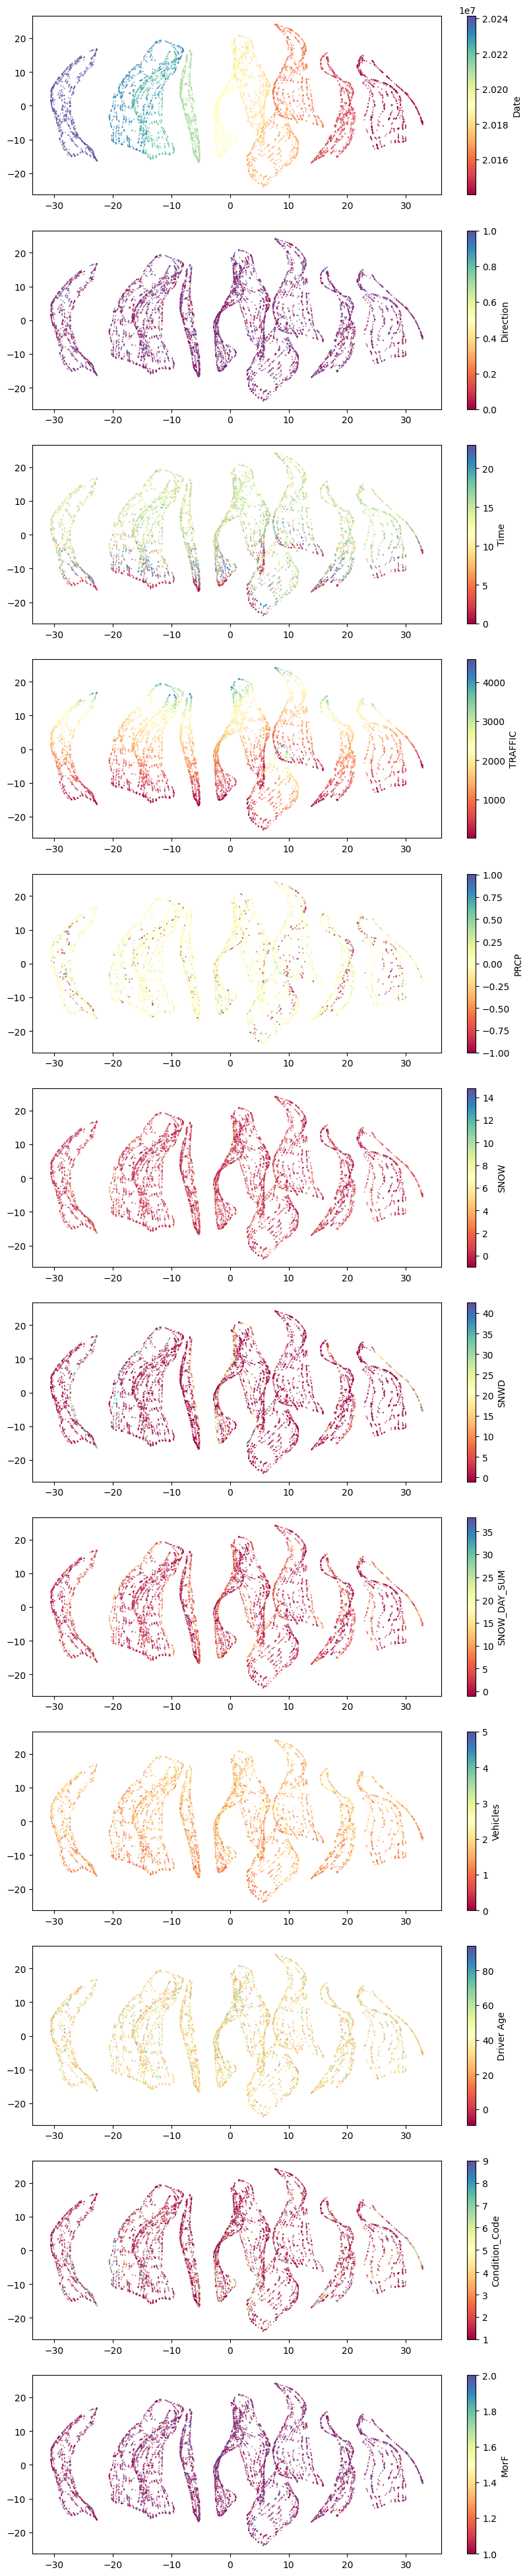

In [92]:
fig, ax = plt.subplots(12, figsize=(10,50))
itter = ['Date','Direction','Time','TRAFFIC','PRCP','SNOW','SNWD','SNOW_DAY_SUM','Vehicles','Driver Age','Condition_Code','MorF']

v = 0
for x in itter:
    scat = ax[v].scatter(crash_clusters_base_2d[:,0], crash_clusters_base_2d[:,1], c=clust[f'{x}'], cmap="Spectral", s=0.1)
    cbar = fig.colorbar(scat, ax=ax[v])
    cbar.set_label(f'{x}')
    v += 1

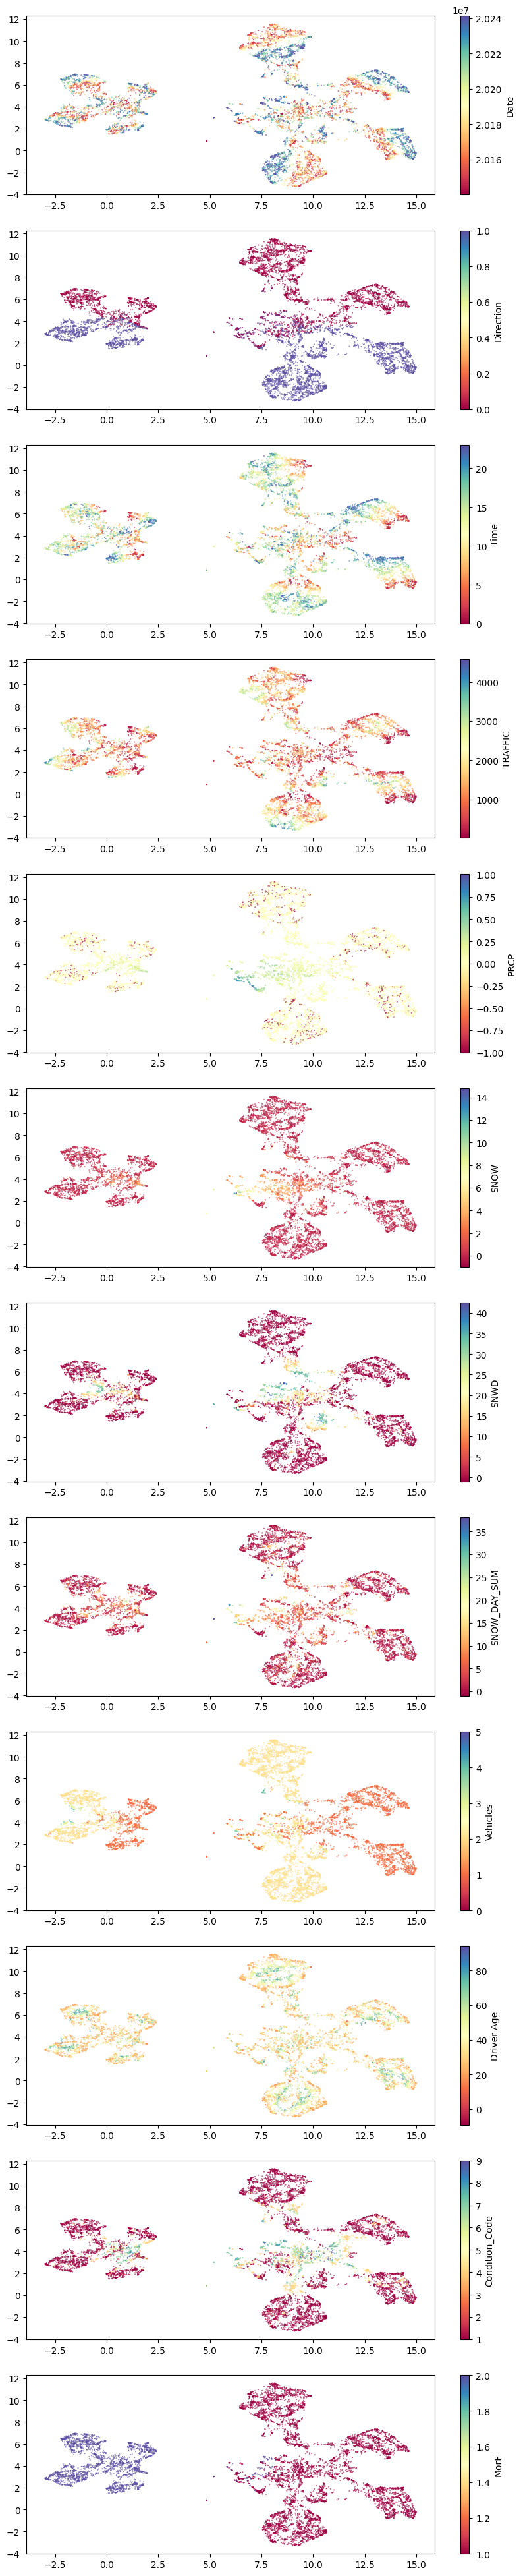

: 

In [ ]:
fig, ax = plt.subplots(12, figsize=(10,50))
itter = ['Date','Direction','Time','TRAFFIC','PRCP','SNOW','SNWD','SNOW_DAY_SUM','Vehicles','Driver Age','Condition_Code','MorF']

v = 0
for x in itter:
    scat = ax[v].scatter(embedded_data_crash[:,0], embedded_data_crash[:,1], c=clust[f'{x}'], cmap="Spectral", s=0.1)
    cbar = fig.colorbar(scat, ax=ax[v])
    cbar.set_label(f'{x}')
    v += 1

In [43]:
descrive_crash_clusters = crash_clusters
descrive_crash_clusters['clusters'] = AC_traffic_data

for x in range(0,10):
    temp_df = descrive_crash_clusters[descrive_crash_clusters['clusters'] == x]
    temp_df = temp_df.drop(columns={'Date', 'clusters'})
    temp_df.describe().to_csv(f'cluster_tsne_cluster_stats/cluster_{x}')

In [48]:
crash_clusters = crash_clusters.drop(columns={'cluster'})
crash_clusters.head()

Direction  Time  TRAFFIC  PRCP  SNOW  SNWD  SNOW_DAY_SUM  Vehicles  \
0          1     2       86  0.12   1.9  13.0           1.9       1.0   
1          0     2      153  0.12   1.9  13.0           1.9       1.0   
2          1    12     2273  0.12   1.9  13.0           1.9       1.0   
3          0    12     1729  0.12   1.9  13.0           1.9       1.0   
4          1    21     1064  0.06   1.1  15.5           8.0       1.0   

   Driver Age  Condition_Code  MorF  DayOfWeek  
0        26.0             1.0   1.0          3  
1        26.0             1.0   1.0          3  
2        18.0             1.0   1.0          3  
3        18.0             1.0   1.0          3  
4        36.0             1.0   1.0          7

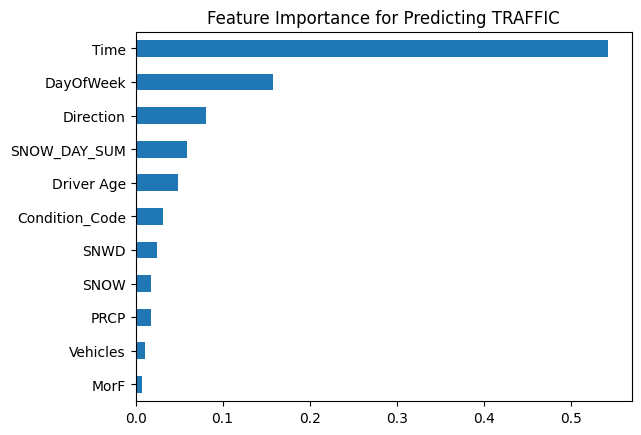

In [ ]:
X = crash_clusters.drop('TRAFFIC', axis=1).fillna(-1)
y = crash_clusters['TRAFFIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance for Predicting TRAFFIC')
plt.show()

In [53]:
importances.sort_values()

MorF              0.007299
Vehicles          0.010832
PRCP              0.017255
SNOW              0.017827
SNWD              0.024561
Condition_Code    0.031916
Driver Age        0.048976
SNOW_DAY_SUM      0.059045
Direction         0.081276
DayOfWeek         0.158057
Time              0.542956
dtype: float64

In [ ]:
g = 0
for x in importances:
    g += x
g

1.0

In [64]:
new_data = pd.read_csv('TRUE_DATA.csv')
new_data = new_data[new_data['Vehicles'].isna()]

In [65]:
new_data.shape

(157629, 12)

In [66]:
new_data = new_data.drop(columns={'Vehicles','Driver Age','Condition_Code','MorF','Date'})

In [67]:
new_data.shape

(157629, 7)

In [68]:
new_data = new_data.fillna(-1)

In [70]:
new_data['Direction'] = new_data['Direction'].map(lambda x: 0 if x == 'S' else 1)

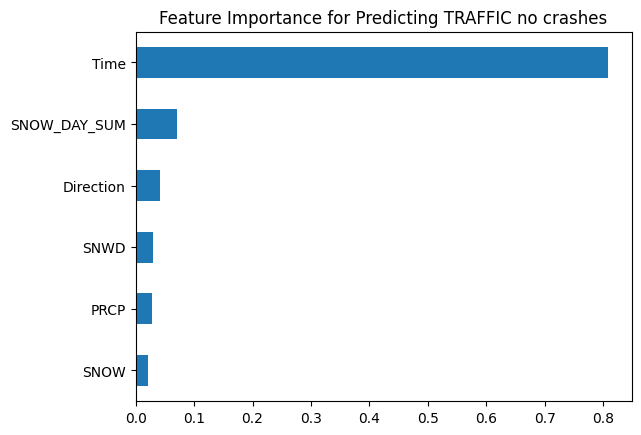

In [72]:
X = new_data.drop('TRAFFIC', axis=1)
y = new_data['TRAFFIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

importances_t = pd.Series(model.feature_importances_, index=X.columns)
importances_t.sort_values().plot(kind='barh')
plt.title('Feature Importance for Predicting TRAFFIC no crashes')
plt.show()

In [73]:
importances_t.sort_values()

SNOW            0.021685
PRCP            0.027449
SNWD            0.030436
Direction       0.042344
SNOW_DAY_SUM    0.070261
Time            0.807825
dtype: float64

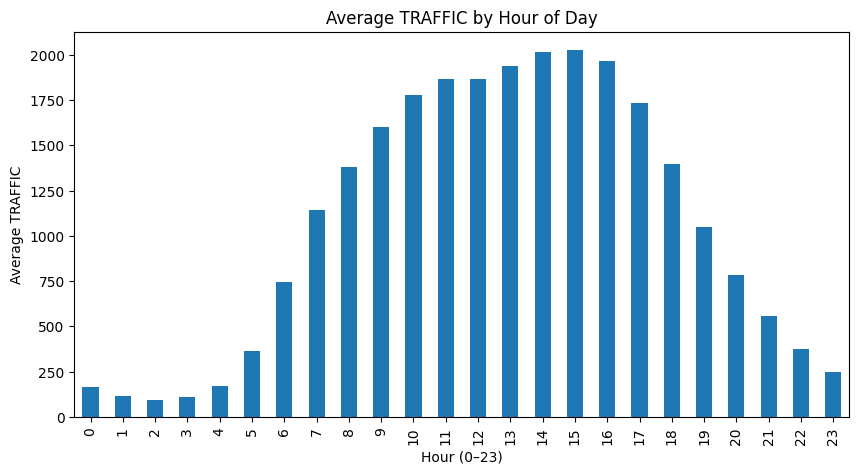

In [ ]:
new_data.groupby('Time')['TRAFFIC'].mean().plot(kind='bar', figsize=(10,5))
plt.title('Average TRAFFIC by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average TRAFFIC')
plt.show()

In [ ]:
descrive_crash_clusters['clusters'] = AC_traffic_data
descrive_crash_clusters = descrive_crash_clusters.fillna(-1)

for x in range(0, 10):
    temp_df = descrive_crash_clusters[descrive_crash_clusters['clusters'] == x]
    temp_df = temp_df.drop(columns={'Date', 'clusters'})

    X = temp_df.drop('TRAFFIC', axis=1)
    y = temp_df['TRAFFIC']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    importances_t = pd.Series(model.feature_importances_, index=X.columns)

    plt.figure(figsize=(10, 6))
    importances_t.sort_values().plot(kind='barh')
    plt.title(f'Feature Importance for Cluster {x}')
    plt.tight_layout()
    plt.savefig(f'cluster_tsne_cluster_stats/cluster_{x}_feature_importance.png')
    plt.close()
    
    temp_df.describe().to_csv(f'cluster_tsne_cluster_stats/cluster_{x}')